# Optimization of parameters in genetic algorithms

This notebook gathers the results for the parameter optimization made on the multi-objective genetic algorithms, considering a binary threshold of 100.

### Brief explanation

With the previous exploration of parameters, we were able to determine which values resulted in better performances. There was obviously not a unique configuration yielding better results so, for the optimization run, we still allowed some variation. We basically assigned different probabilities of appearence to each of the parameters' values. The parameters, their possible values and their associated probabilities are:

- **Algorithm**: ALG1 (NSGA2), ALG2 (SPEA2) ------------------------------------------- Probabilities: 5/10, 5/10
- **Estimator**: SVM1 (c=2), SVM2 (c=10), SVM3 (c=50) ------------------------------- Probabilities: 3/10, 6/10, 1/10
- **Mutation rate**: MR1 (0.05), MR2 (0.1), MR3 (0.15) ---------------------------------- Probabilities: 4/10, 4/10, 2/10
- **Selection**: SE1 (tournament 2-1) , SE2 (tournament 5-2), SE3 (roulette) ------ Probabilities: 5/10, 3/10, 2/10

For each region, we run 10 models whose parameters are selected according to these probabilities. Each of the models yields a set of solutions and the best is chosen according to accuracy and f1 score in the test dataset.

### Import the packages

We import the packages that will be needed. In this case, everything is already contained in the gatools.py file, that loads submodules of PyWin module.

In [1]:
import matplotlib
import seaborn
import sys
sys.path.insert(0,'../../Tools')
from orderedlist import *
from gatools import *
bi = Binarization()
mo = Models()

In [2]:
pandas.set_option('display.max_rows', None)
pandas.set_option('display.max_columns', None)
pandas.set_option('display.width', None)
pandas.set_option('display.max_colwidth', None)

### Preparation of results

#### General stuff

In [3]:
qual_aal = bi.get_binary(pandas.read_csv('../../Data/Y_aal_quan.csv'),100)
qual_brodmann = bi.get_binary(pandas.read_csv('../../Data/Y_brodmann_quan.csv'),100)

In [4]:
features = pandas.read_csv('./Optimization_multi_100/optimization_best_features.csv')
features_all = pandas.read_csv('./Optimization_multi_100/optimization_features.csv')
train = pandas.read_csv('./Optimization_multi_100/optimization_best_train.csv')
test = pandas.read_csv('./Optimization_multi_100/optimization_best_test.csv')

In [5]:
tasks = ['_'.join([i.split('_')[-2],i.split('_')[-1]]) for i in list(features['Model'])]
tasks_brodmann = [i.split('_')[-1] for i in tasks if "b" in i]
tasks_aal = [i for i in tasks if not "b" in i]
tasks_aal.remove('f1mo_l')
tasks_aal.remove('f1mo_r')

In [ ]:
aal_list.remove('f1mo_l')
aal_list.remove('f1mo_r')

#### Metrics

In [6]:
pct_aal = round(numpy.divide(numpy.sum(qual_aal),qual_aal.shape[0]).to_frame().transpose(),3)
pct_aal = pct_aal.add_prefix('Region=')
pct_aal.index=['percentage_positive']
pct_brodmann = round(numpy.divide(numpy.sum(qual_brodmann),qual_brodmann.shape[0]).to_frame().transpose(),3)
pct_brodmann = pct_brodmann.add_prefix('Region=')
pct_brodmann.index=['percentage_positive']

In [7]:
metrics_aal = pandas.DataFrame()
for task in tasks_aal:
    temp_metrics = mo.evaluate_metrics(train,test,task)
    try: metrics_aal = pandas.concat([metrics_aal,temp_metrics],axis=1)
    except: metrics_aal = temp_metrics

In [8]:
metrics_brodmann = pandas.DataFrame()
for task in tasks_brodmann:
    temp_metrics = mo.evaluate_metrics(train,test,task)
    try: metrics_brodmann = pandas.concat([metrics_brodmann,temp_metrics],axis=1)
    except: metrics_brodmann = temp_metrics

In [9]:
features_aal = pandas.DataFrame()
for task in tasks_aal:
    temp_features = mo.evaluate_features(features,features_all,task)
    try: features_aal = pandas.concat([features_aal,temp_features],axis=0)
    except: features_aal = temp_features

#### Features

In [10]:
features_brodmann = pandas.DataFrame()
for task in tasks_brodmann:
    temp_features = mo.evaluate_features(features,features_all,task)
    try: features_brodmann = pandas.concat([features_brodmann,temp_features],axis=0)
    except: features_brodmann = temp_features

In [11]:
map_aal = pandas.DataFrame()
for task in aal_list:
    try: 
        temp_map = mo.map_features(features_all,features_list,task)
        try: map_aal = pandas.concat([map_aal,temp_map],axis=0)
        except: map_aal = temp_map
    except: pass

In [12]:
map_brodmann = pandas.DataFrame()
for task in brodmann_list:
    try: 
        temp_map = mo.map_features(features_all,features_list,task)
        try: map_brodmann = pandas.concat([map_brodmann,temp_map],axis=0)
        except: map_brodmann = temp_map
    except: pass

### Results

#### AAL atlas (90 regions)

Down below we show the **sorted regions according to accuracy and f1 score**. In the second table, only test information is given (those regions appearing at the top are the ones with better overall models).

In [13]:
metrics_pct_aal = pandas.concat([metrics_aal,pct_aal],join='inner')
metrics_pct_aal

,Region=in_l,Region=o3_l,Region=ro_l,Region=o3_r,Region=f3o_l,Region=p1_r,Region=o1_r,Region=hip_r,Region=gr_l,Region=tha_r,Region=gr_r,Region=tha_l,Region=t3_l,Region=smg_r,Region=fusi_r,Region=f2o_r,Region=oc_r,Region=t2_l,Region=f3t_l,Region=f1o_l,Region=o1_l,Region=oc_l,Region=p2_l,Region=o2_l,Region=cau_l,Region=o2_r,Region=ag_l,Region=f1o_r,Region=fusi_l,Region=hip_l,Region=sma_r,Region=hes_r,Region=put_l,Region=ag_r,Region=f2o_l,Region=smg_l,Region=f1_l,Region=q_r,Region=f3op_l,Region=t3_r,Region=f1m_r,Region=p2_r,Region=pq_l,Region=t2p_l,Region=t2_r,Region=acin_l,Region=q_l,Region=t1p_l,Region=t2p_r,Region=acin_r,Region=cau_r,Region=f3t_r,Region=f3o_r,Region=ro_r,Region=in_r,Region=f1m_l,Region=f2_l,Region=f1_r,Region=phip_l,Region=f2_r,Region=sma_l,Region=pcin_r,Region=t1p_r,Region=p1_l,Region=ling_r,Region=pq_r,Region=pre_r,Region=mcin_r,Region=pcin_l,Region=phip_r,Region=post_r,Region=pre_l,Region=ling_l,Region=put_r,Region=t1_r,Region=pcl_l,Region=mcin_l,Region=hes_l,Region=post_l,Region=t1_l,Region=f3op_r,Region=v1_r,Region=v1_l,Region=pal_l,Region=amyg_l,Region=pal_r,Region=amyg_r
accuracy_test,0.968+/-0.018,0.928+/-0.021,0.980+/-0.016,0.944+/-0.020,0.945+/-0.026,0.939+/-0.032,0.933+/-0.028,0.957+/-0.020,0.934+/-0.024,0.943+/-0.017,0.925+/-0.027,0.944+/-0.022,0.816+/-0.036,0.895+/-0.024,0.872+/-0.041,0.942+/-0.023,0.967+/-0.017,0.818+/-0.027,0.893+/-0.031,0.942+/-0.022,0.957+/-0.024,0.975+/-0.016,0.847+/-0.030,0.858+/-0.034,0.939+/-0.027,0.828+/-0.043,0.808+/-0.035,0.939+/-0.027,0.854+/-0.032,0.966+/-0.019,0.941+/-0.026,0.982+/-0.013,0.968+/-0.020,0.821+/-0.033,0.937+/-0.025,0.884+/-0.028,0.873+/-0.034,0.938+/-0.027,0.937+/-0.028,0.765+/-0.043,0.861+/-0.031,0.839+/-0.033,0.867+/-0.029,0.881+/-0.030,0.754+/-0.038,0.886+/-0.037,0.940+/-0.023,0.905+/-0.021,0.835+/-0.035,0.879+/-0.032,0.963+/-0.017,0.862+/-0.029,0.853+/-0.041,0.952+/-0.020,0.902+/-0.031,0.870+/-0.028,0.820+/-0.034,0.824+/-0.036,0.895+/-0.027,0.802+/-0.036,0.933+/-0.022,0.930+/-0.020,0.844+/-0.043,0.853+/-0.039,0.901+/-0.025,0.836+/-0.034,0.890+/-0.032,0.802+/-0.038,0.857+/-0.041,0.815+/-0.039,0.916+/-0.028,0.846+/-0.025,0.878+/-0.037,0.971+/-0.013,0.774+/-0.031,0.940+/-0.020,0.782+/-0.042,0.981+/-0.015,0.905+/-0.024,0.802+/-0.038,0.821+/-0.040,0.925+/-0.026,0.873+/-0.036,0.978+/-0.013,0.978+/-0.012,0.977+/-0.010,0.985+/-0.010
accuracy_train,1.000+/-0.000,0.965+/-0.008,0.984+/-0.006,0.992+/-0.004,0.984+/-0.007,0.976+/-0.007,0.995+/-0.002,0.999+/-0.002,0.965+/-0.006,0.982+/-0.005,0.946+/-0.005,0.990+/-0.004,0.849+/-0.010,0.970+/-0.006,0.970+/-0.007,0.992+/-0.004,0.996+/-0.002,0.896+/-0.011,0.922+/-0.009,0.994+/-0.003,0.994+/-0.004,0.993+/-0.004,0.927+/-0.012,0.926+/-0.009,0.983+/-0.004,0.881+/-0.014,0.853+/-0.013,1.000+/-0.000,0.890+/-0.011,0.988+/-0.004,0.974+/-0.008,0.992+/-0.003,0.998+/-0.002,0.874+/-0.017,0.978+/-0.006,0.937+/-0.007,0.925+/-0.010,0.975+/-0.005,0.974+/-0.006,0.846+/-0.015,0.895+/-0.008,0.942+/-0.007,0.950+/-0.007,0.922+/-0.009,0.882+/-0.009,0.900+/-0.016,0.977+/-0.009,0.989+/-0.005,0.886+/-0.011,0.927+/-0.010,0.996+/-0.003,0.900+/-0.014,0.881+/-0.011,0.977+/-0.006,0.976+/-0.006,0.956+/-0.008,0.899+/-0.013,0.855+/-0.011,0.952+/-0.010,0.916+/-0.010,0.966+/-0.006,0.950+/-0.007,0.956+/-0.008,0.871+/-0.018,0.956+/-0.007,0.877+/-0.014,0.966+/-0.009,0.818+/-0.015,0.911+/-0.011,0.847+/-0.015,0.978+/-0.009,0.920+/-0.011,0.934+/-0.012,0.997+/-0.002,0.853+/-0.015,0.959+/-0.009,0.820+/-0.015,0.984+/-0.003,0.979+/-0.006,0.839+/-0.017,0.903+/-0.014,0.996+/-0.003,0.936+/-0.012,0.982+/-0.009,0.983+/-0.005,0.983+/-0.004,0.995+/-0.002
f1_test,0.761+/-0.148,0.716+/-0.069,0.735+/-0.186,0.698+/-0.114,0.693+/-0.107,0.714+/-0.135,0.679+/-0.109,0.678+/-0.140,0.670+/-0.130,0.619+/-0.098,0.626+/-0.095,0.622+/-0.124,0.687+/-0.050,0.635+/-0.090,0.685+/-0.101,0.636+/-0.141,0.642+/-0.178,0.663+/-0.043,0.639+/-0.095,0.629+/-0.145,0.638+/-0.170,0.648+/-0.211,0.649+/-0.073,0.631+/-0.063,0.624+/-0.149,0.651+/-0.059,0.652+/-0.051,0.625+/-0.164,0.625+/-0.075,0.583+/-0

In [14]:
metrics_pct_aal.transpose()[['accuracy_test','f1_test','precision_test','recall_test','percentage_positive']]

,accuracy_test,f1_test,precision_test,recall_test,percentage_positive
Region=in_l,0.968+/-0.018,0.761+/-0.148,0.850+/-0.148,0.720+/-0.212,0.075
Region=o3_l,0.928+/-0.021,0.716+/-0.069,0.641+/-0.092,0.826+/-0.092,0.108
Region=ro_l,0.980+/-0.016,0.735+/-0.186,0.617+/-0.245,1.000+/-0.000,0.024
Region=o3_r,0.944+/-0.020,0.698+/-0.114,0.745+/-0.154,0.690+/-0.166,0.096
Region=f3o_l,0.945+/-0.026,0.693+/-0.107,0.661+/-0.167,0.768+/-0.126,0.078
Region=p1_r,0.939+/-0.032,0.714+/-0.135,0.680+/-0.178,0.776+/-0.148,0.096
Region=o1_r,0.933+/-0.028,0.679+/-0.109,0.742+/-0.158,0.639+/-0.101,0.108
Region=hip_r,0.957+/-0.020,0.678+/-0.140,0.799+/-0.185,0.616+/-0.169,0.075
Region=gr_l,0.934+/-0.024,0.670+/-0.130,0.589+/-0.137,0.803+/-0.179,0.084
Region=tha_r,0.943+/-0.017,0.619+/-0.098,0.548+/-0.104,0.736+/-0.145,0.063


Down below, we include the **selected features for the best model and the most common features in all the models**.

In [15]:
features_aal

,Features best model,Features all models,Avg#
Region=in_l,"[ace3_memory, ft_formal, mst_indirect, diagnostic_FTD, tmt_a, mst_direct, education_years, st_1, rocf_recognition, rocf_3min, rocf_time]","[(diagnostic_FTD, 0.99), (rocf_recognition, 0.49), (tlt_total_correct, 0.47), (mst_direct, 0.47), (fcsrt_dif_free, 0.47), (ace3_fluency, 0.37), (st_1, 0.29), (rocf_3min, 0.29), (ace3_attention, 0.26), (education_years, 0.24), (vospt_silhouette, 0.24), (st_3, 0.23), (rocf_time, 0.22), (tmt_a, 0.2), (ace3_language, 0.18), (vospt_location, 0.11), (fcsrt_lt, 0.1), (mst_indirect, 0.1), (rocf_30min, 0.09), (ace3_memory, 0.08), (ft_formal, 0.08), (bnt, 0.08), (current_age, 0.08), (ace3_visuospatial, 0.06), (ace, 0.06), (diagnostic_AD, 0.05), (rocf_copy, 0.03), (st_2, 0.03), (ft_animals, 0.03), (fcsrt_dif_total, 0.03), (vospt_discrimination, 0.03), (sex_male, 0.03), (fcsrt_l1, 0.03), (cbtt_direct, 0.02), (tmt_b, 0.02), (vospt_decision, 0.02), (sdmt, 0.02), (fcsrt_total, 0.01), (sex_female, 0.01), (diagnostic_CT, 0.01), (cbtt_indirect, 0.01)]",6.69
Region=o3_l,"[diagnostic_FTD, cbtt_direct, fcsrt_dif_total, diagnostic_AD, vospt_decision, mst_direct, rocf_3min, vospt_discrimination, rocf_copy, cbtt_indirect]","[(vospt_discrimination, 0.93), (diagnostic_FTD, 0.85), (rocf_3min, 0.77), (mst_direct, 0.61), (cbtt_indirect, 0.51), (fcsrt_lt, 0.33), (fcsrt_dif_total, 0.25), (rocf_copy, 0.24), (st_3, 0.22), (cbtt_direct, 0.2), (st_1, 0.17), (ace3_visuospatial, 0.17), (diagnostic_AD, 0.16), (sdmt, 0.15), (vospt_decision, 0.1), (vospt_silhouette, 0.1), (education_years, 0.09), (mst_indirect, 0.09), (current_age, 0.09), (rocf_recognition, 0.08), (ace3_fluency, 0.07), (ace3_attention, 0.07), (st_2, 0.06), (tmt_b, 0.06), (bnt, 0.05), (ft_formal, 0.05), (rocf_30min, 0.05), (vospt_location, 0.03), (ace3_memory, 0.03), (ace, 0.03), (tlt_total_correct, 0.03), (ace3_language, 0.02), (sex_female, 0.01), (rocf_time, 0.01), (tmt_a, 0.01), (ft_animals, 0.01), (fcsrt_dif_free, 0.01), (fcsrt_l1, 0.01)]",6.74
Region=ro_l,"[education_years, ft_animals, vospt_discrimination, ace3_memory, sex_male, vospt_silhouette, rocf_recognition]","[(vospt_silhouette, 0.97), (vospt_location, 0.68), (vospt_discrimination, 0.64), (ace3_memory, 0.61), (ft_animals, 0.39), (sex_female, 0.36), (education_years, 0.33), (bnt, 0.32), (fcsrt_dif_free, 0.19), (rocf_recognition, 0.12), (sex_male, 0.12), (ace3_fluency, 0.11), (tmt_b, 0.1), (vospt_decision, 0.07), (diagnostic_FTD, 0.07), (st_3, 0.03), (cbtt_indirect, 0.01), (fcsrt_total, 0.01), (fcsrt_l1, 0.01), (ace, 0.01), (rocf_copy, 0.01), (ace3_language, 0.01), (ace3_attention, 0.01)]",5.22
Region=o3_r,"[tmt_b, rocf_copy, tlt_total_correct, rocf_recognition, diagnostic_CT, diagnostic_FTD, rocf_30min, fcsrt_l1, vospt_location, cbtt_indirect, current_age, bnt, fcsrt_dif_free, sex_male, ace3_visuospatial, education_years, cbtt_direct, fcsrt_lt]","[(rocf_copy, 0.97), (current_age, 0.81), (diagnostic_FTD, 0.77), (cbtt_indirect, 0.68), (vospt_silhouette, 0.5), (fcsrt_l1, 0.44), (tmt_a, 0.4), (bnt, 0.39), (rocf_recognition, 0.37), (sex_female, 0.36), (fcsrt_dif_total, 0.34), (diagnostic_AD, 0.33), (ace3_visuospatial, 0.33), (sex_male, 0.31), (tlt_total_correct, 0.27), (education_years, 0.27), (fcsrt_lt, 0.26), (cbtt_direct, 0.26), (tmt_b, 0.24), (diagnostic_CT, 0.22), (rocf_30min, 0.21), (st_2, 0.21), (rocf_3min, 0.21), (vospt_discrimination, 0.21), (rocf_time, 0.2), (vospt_location, 0.2), (mst_indirect, 0.19), (ace3_attention, 0.16), (mst_direct, 0.16), (sdmt, 0.14), (st_3, 0.13), (fcsrt_total, 0.13), (fcsrt_dif_free, 0.11), (ace3_memory, 0.08), (ace3_language, 0.07), (ft_formal, 0.07), (ace, 0.07), (st_1, 0.06), (vospt_decision, 0.04), (ft_animals, 0.04), (ace3_fluency, 0.02)]",11.22
Region=f3o_l,"[tlt_total_correct, diagnostic_FTD, sex_male, cbtt_indirect, ace3_memory, mst_direct, current_age, st_1, vospt_discrimination]","[(diagnostic_FTD, 0.85), (current_age, 0.77), (vospt_discrimination, 0.53), (st_1, 0.53), (ace3_memory, 0.51), (sex_female, 

Down below, we include a **heatmap indicating the frequency of each feature in predicting each region**. The regions are ordered according to the lobe they belong to. The features are ordered by nature (diagnostic features, demographic features and cognitive features -ordered themselves according to the cognitive function measured-). This makes it easier to see patterns.

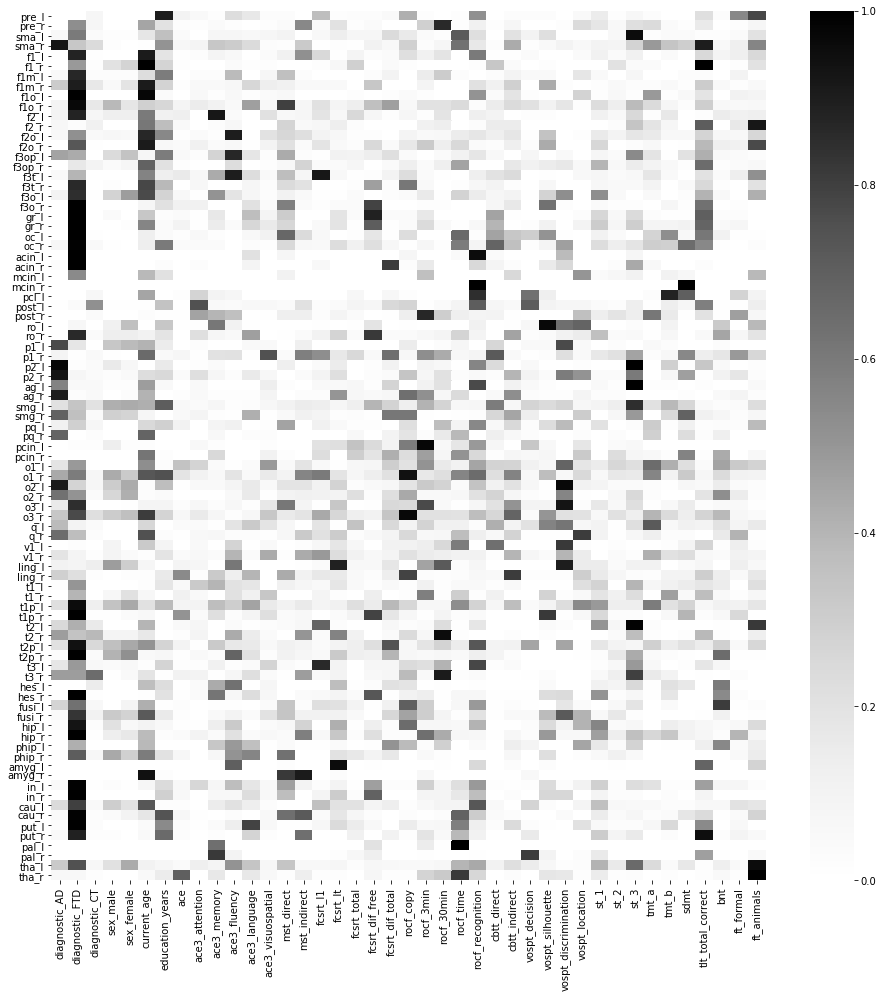

In [16]:
matplotlib.rcParams['figure.figsize'] = (16,16)
seaborn.heatmap(map_aal,cmap='Greys',xticklabels=True,yticklabels=True)

#### Brodmann atlas (47 regions)

Down below we show the **sorted regions according to accuracy and f1 score**. In the second table, only test information is given (those regions appearing at the top are the ones with better overall models).

In [17]:
metrics_pct_brodmann = pandas.concat([metrics_brodmann,pct_brodmann],join='inner')
metrics_pct_brodmann

,Region=b17,Region=b25,Region=b18,Region=b3,Region=b4,Region=b47,Region=b44,Region=b39,Region=b28,Region=b45,Region=b20,Region=b36,Region=b32,Region=b37,Region=b7,Region=b21,Region=b2,Region=b5,Region=b19,Region=b22,Region=b13,Region=b40,Region=b11,Region=b46,Region=b38,Region=b10,Region=b9,Region=b8,Region=b24,Region=b41,Region=b31,Region=b42,Region=b6,Region=b30,Region=b23,Region=b34,Region=b35,Region=b1,Region=b43
accuracy_test,0.999+/-0.004,0.963+/-0.019,0.937+/-0.030,0.980+/-0.013,0.981+/-0.014,0.915+/-0.035,0.978+/-0.013,0.833+/-0.023,0.981+/-0.019,0.939+/-0.023,0.817+/-0.047,0.946+/-0.019,0.915+/-0.026,0.835+/-0.037,0.846+/-0.027,0.788+/-0.045,0.960+/-0.022,0.977+/-0.022,0.820+/-0.039,0.827+/-0.028,0.920+/-0.021,0.782+/-0.044,0.897+/-0.033,0.919+/-0.026,0.825+/-0.038,0.862+/-0.036,0.823+/-0.032,0.854+/-0.041,0.882+/-0.035,0.963+/-0.026,0.838+/-0.042,0.981+/-0.015,0.799+/-0.045,0.966+/-0.017,0.923+/-0.028,0.987+/-0.017,0.983+/-0.013,0.987+/-0.009,0.986+/-0.010
accuracy_train,1.000+/-0.000,0.987+/-0.004,0.999+/-0.002,0.992+/-0.003,0.999+/-0.002,0.976+/-0.006,0.991+/-0.005,0.887+/-0.012,0.995+/-0.003,0.965+/-0.005,0.859+/-0.013,0.982+/-0.005,0.956+/-0.008,0.877+/-0.012,0.896+/-0.009,0.881+/-0.013,0.976+/-0.006,0.980+/-0.005,0.889+/-0.013,0.859+/-0.006,0.949+/-0.008,0.823+/-0.011,0.980+/-0.006,0.990+/-0.005,0.859+/-0.010,0.978+/-0.005,0.869+/-0.011,0.954+/-0.010,0.921+/-0.010,0.975+/-0.008,0.929+/-0.009,1.000+/-0.000,0.836+/-0.016,0.992+/-0.004,0.967+/-0.007,0.994+/-0.003,0.986+/-0.004,0.988+/-0.002,0.991+/-0.002
f1_test,0.973+/-0.090,0.726+/-0.119,0.735+/-0.123,0.674+/-0.170,0.689+/-0.187,0.693+/-0.105,0.687+/-0.185,0.696+/-0.047,0.746+/-0.255,0.640+/-0.115,0.723+/-0.065,0.619+/-0.118,0.630+/-0.110,0.673+/-0.066,0.645+/-0.062,0.713+/-0.057,0.624+/-0.167,0.655+/-0.235,0.654+/-0.064,0.633+/-0.061,0.563+/-0.094,0.685+/-0.060,0.606+/-0.108,0.590+/-0.136,0.618+/-0.062,0.605+/-0.104,0.577+/-0.058,0.600+/-0.109,0.544+/-0.111,0.566+/-0.227,0.554+/-0.092,0.579+/-0.329,0.541+/-0.084,0.463+/-0.235,0.422+/-0.149,0.547+/-0.461,0.427+/-0.377,0.253+/-0.313,0.253+/-0.324
f1_train,1.000+/-0.000,0.912+/-0.023,0.995+/-0.007,0.826+/-0.062,0.978+/-0.041,0.913+/-0.021,0.876+/-0.060,0.793+/-0.018,0.919+/-0.038,0.794+/-0.025,0.783+/-0.018,0.879+/-0.027,0.818+/-0.027,0.759+/-0.020,0.760+/-0.016,0.838+/-0.016,0.755+/-0.048,0.679+/-0.068,0.787+/-0.020,0.706+/-0.012,0.734+/-0.030,0.742+/-0.015,0.924+/-0.022,0.951+/-0.024,0.690+/-0.018,0.940+/-0.012,0.694+/-0.020,0.879+/-0.023,0.689+/-0.030,0.664+/-0.083,0.806+/-0.021,1.000+/-0.000,0.621+/-0.025,0.867+/-0.066,0.722+/-0.048,0.799+/-0.080,0.568+/-0.091,0.491+/-0.069,0.558+/-0.077
precision_test,0.960+/-0.136,0.759+/-0.184,0.779+/-0.147,0.539+/-0.219,0.621+/-0.266,0.678+/-0.153,0.663+/-0.230,0.646+/-0.044,0.726+/-0.299,0.543+/-0.121,0.646+/-0.074,0.602+/-0.126,0.583+/-0.114,0.604+/-0.075,0.598+/-0.063,0.651+/-0.063,0.520+/-0.202,0.561+/-0.272,0.568+/-0.075,0.589+/-0.062,0.482+/-0.106,0.637+/-0.070,0.581+/-0.127,0.578+/-0.167,0.555+/-0.068,0.592+/-0.115,0.552+/-0.075,0.574+/-0.100,0.435+/-0.105,0.465+/-0.270,0.477+/-0.100,0.680+/-0.400,0.470+/-0.090,0.399+/-0.236,0.344+/-0.180,0.520+/-0.458,0.353+/-0.351,0.187+/-0.232,0.193+/-0.265
precision_train,1.000+/-0.000,0.839+/-0.039,0.990+/-0.014,0.709+/-0.091,0.960+/-0.074,0.849+/-0.034,0.784+/-0.096,0.738+/-0.030,0.852+/-0.068,0.658+/-0.034,0.702+/-0.024,0.785+/-0.042,0.709+/-0.036,0.669+/-0.027,0.702+/-0.026,0.768+/-0.026,0.608+/-0.061,0.518+/-0.082,0.673+/-0.028,0.647+/-0.016,0.596+/-0.040,0.689+/-0.020,0.859+/-0.037,0.907+/-0.044,0.613+/-0.025,0.887+/-0.022,0.642+/-0.027,0.811+/-0.036,0.546+/-0.034,0.503+/-0.097,0.676+/-0.031,1.000+/-0.000,0.534+/-0.032,0.771+/-0.105,0.568+/-0.062,0.673+/-0.122,0.403+/-0.095,0.328+/-0.060,0.391+/-0.074
recall_test,1.000+/-0.000,0.728+/-0.146,0.714+/-0.142,0.980+/-0.098,0.900+/-0.200,0.744+/-0.141,0.780+/-0.248,0.765+/-0.097,0.840+/-0.273,0.806+/-0.165,0.827+/-0.082,0.664+/-0.162,0.717+/-0.184,0.771+/-0.101,0.709+/-0.097,0.79

In [18]:
metrics_pct_brodmann.transpose()[['accuracy_test','f1_test','precision_test','recall_test','percentage_positive']]

,accuracy_test,f1_test,precision_test,recall_test,percentage_positive
Region=b17,0.999+/-0.004,0.973+/-0.090,0.960+/-0.136,1.000+/-0.000,0.015
Region=b25,0.963+/-0.019,0.726+/-0.119,0.759+/-0.184,0.728+/-0.146,0.066
Region=b18,0.937+/-0.030,0.735+/-0.123,0.779+/-0.147,0.714+/-0.142,0.123
Region=b3,0.980+/-0.013,0.674+/-0.170,0.539+/-0.219,0.980+/-0.098,0.018
Region=b4,0.981+/-0.014,0.689+/-0.187,0.621+/-0.266,0.900+/-0.200,0.021
Region=b47,0.915+/-0.035,0.693+/-0.105,0.678+/-0.153,0.744+/-0.141,0.127
Region=b44,0.978+/-0.013,0.687+/-0.185,0.663+/-0.230,0.780+/-0.248,0.03
Region=b39,0.833+/-0.023,0.696+/-0.047,0.646+/-0.044,0.765+/-0.097,0.253
Region=b28,0.981+/-0.019,0.746+/-0.255,0.726+/-0.299,0.840+/-0.273,0.03
Region=b45,0.939+/-0.023,0.640+/-0.115,0.543+/-0.121,0.806+/-0.165,0.066


Down below, we include the **selected features for the best model and the most common features in all the models**.

In [19]:
features_brodmann

,Features best model,Features all models,Avg#
Region=b17,"[vospt_discrimination, sdmt, bnt, rocf_time, ft_formal, tlt_total_correct]","[(rocf_time, 0.99), (sdmt, 0.59), (tmt_a, 0.59), (fcsrt_l1, 0.57), (ft_formal, 0.36), (bnt, 0.34), (tlt_total_correct, 0.32), (vospt_discrimination, 0.31), (vospt_location, 0.26), (ace3_language, 0.2), (cbtt_direct, 0.16), (ace3_fluency, 0.12), (ace3_visuospatial, 0.08), (st_3, 0.08), (current_age, 0.07), (ft_animals, 0.03), (fcsrt_lt, 0.02), (fcsrt_dif_free, 0.02), (st_2, 0.01), (rocf_30min, 0.01), (ace, 0.01), (tmt_b, 0.01)]",5.15
Region=b25,"[current_age, st_1, tlt_total_correct, diagnostic_FTD, fcsrt_l1, vospt_silhouette, fcsrt_total, vospt_discrimination, fcsrt_dif_total, education_years, st_3, cbtt_direct, rocf_time, ft_animals, ace3_language, cbtt_indirect, fcsrt_lt, tmt_a]","[(diagnostic_FTD, 1.0), (vospt_discrimination, 0.91), (education_years, 0.61), (fcsrt_dif_free, 0.55), (tlt_total_correct, 0.51), (rocf_time, 0.51), (vospt_silhouette, 0.36), (fcsrt_l1, 0.35), (st_3, 0.35), (cbtt_direct, 0.31), (current_age, 0.29), (ace3_memory, 0.27), (tmt_a, 0.23), (ft_animals, 0.18), (fcsrt_total, 0.15), (fcsrt_dif_total, 0.13), (st_1, 0.12), (ace3_language, 0.12), (cbtt_indirect, 0.12), (tmt_b, 0.12), (mst_direct, 0.1), (bnt, 0.1), (st_2, 0.09), (fcsrt_lt, 0.09), (mst_indirect, 0.08), (rocf_3min, 0.08), (diagnostic_CT, 0.06), (rocf_recognition, 0.06), (sdmt, 0.03), (diagnostic_AD, 0.02), (vospt_decision, 0.02), (ace, 0.02), (ace3_attention, 0.02), (rocf_copy, 0.01), (ace3_visuospatial, 0.01), (ace3_fluency, 0.01)]",7.99
Region=b18,"[ace3_memory, vospt_discrimination, diagnostic_AD, diagnostic_FTD, ace, st_3, tmt_a, vospt_decision, cbtt_indirect, rocf_recognition, ace3_visuospatial, rocf_3min, sex_male]","[(vospt_discrimination, 0.9), (rocf_3min, 0.83), (diagnostic_AD, 0.68), (cbtt_indirect, 0.65), (current_age, 0.54), (rocf_recognition, 0.51), (diagnostic_FTD, 0.45), (sex_female, 0.35), (fcsrt_dif_total, 0.3), (sex_male, 0.29), (rocf_copy, 0.27), (ace, 0.24), (vospt_location, 0.23), (tmt_a, 0.22), (fcsrt_lt, 0.22), (ace3_memory, 0.21), (tmt_b, 0.21), (rocf_30min, 0.2), (ace3_visuospatial, 0.17), (vospt_decision, 0.15), (mst_indirect, 0.15), (ft_formal, 0.14), (rocf_time, 0.14), (st_1, 0.12), (fcsrt_dif_free, 0.1), (st_2, 0.09), (ace3_attention, 0.09), (sdmt, 0.09), (bnt, 0.09), (mst_direct, 0.08), (diagnostic_CT, 0.08), (ace3_fluency, 0.08), (cbtt_direct, 0.07), (st_3, 0.07), (fcsrt_total, 0.03), (vospt_silhouette, 0.03), (fcsrt_l1, 0.02), (ace3_language, 0.02), (ft_animals, 0.01)]",9.12
Region=b3,"[st_3, current_age, rocf_copy, rocf_time, diagnostic_AD, fcsrt_dif_free, vospt_decision]","[(vospt_decision, 0.9), (rocf_copy, 0.78), (ace3_memory, 0.72), (cbtt_indirect, 0.58), (fcsrt_dif_free, 0.54), (st_3, 0.33), (fcsrt_dif_total, 0.26), (current_age, 0.26), (mst_direct, 0.21), (ace3_visuospatial, 0.18), (ft_formal, 0.14), (rocf_time, 0.11), (diagnostic_AD, 0.11), (rocf_3min, 0.1), (diagnostic_CT, 0.07), (fcsrt_l1, 0.07), (mst_indirect, 0.06), (fcsrt_lt, 0.03), (education_years, 0.03), (fcsrt_total, 0.03), (st_2, 0.01), (rocf_recognition, 0.01), (ace, 0.01), (rocf_30min, 0.01)]",5.57
Region=b4,"[fcsrt_dif_free, st_2, ace3_memory, mst_indirect, current_age, diagnostic_CT, vospt_decision, ace3_visuospatial, fcsrt_dif_total]","[(fcsrt_dif_free, 0.84), (mst_indirect, 0.81), (vospt_decision, 0.7), (fcsrt_l1, 0.63), (current_age, 0.44), (ace3_visuospatial, 0.37), (fcsrt_dif_total, 0.33), (rocf_copy, 0.26), (cbtt_indirect, 0.19), (st_3, 0.17), (rocf_3min, 0.11), (ace3_memory, 0.09), (ft_formal, 0.09), (mst_direct, 0.09), (bnt, 0.07), (diagnostic_CT, 0.07), (st_2, 0.06), (rocf_30min, 0.04), (diagnostic_AD, 0.03), (education_years, 0.03), (ace, 0.01), (rocf_time, 0.01), (fcsrt_total, 0.01), (rocf_recognition, 0.01)]",5.47
Region=b47,"[current_age, vospt_silhouette, ft_animals, fcsrt_lt, ace3_language, mst_direct, fcsrt_total, fcsrt_dif_free, diagnostic_FTD, fcsrt_dif_total, tlt_total_correct]","[(diagnostic

Down below, we include a **heatmap indicating the frequency of each feature in predicting each region**. The regions are ordered according to the lobe they belong to. The features are ordered by nature (diagnostic features, demographic features and cognitive features -ordered themselves according to the cognitive function measured-). This makes it easier to see patterns.

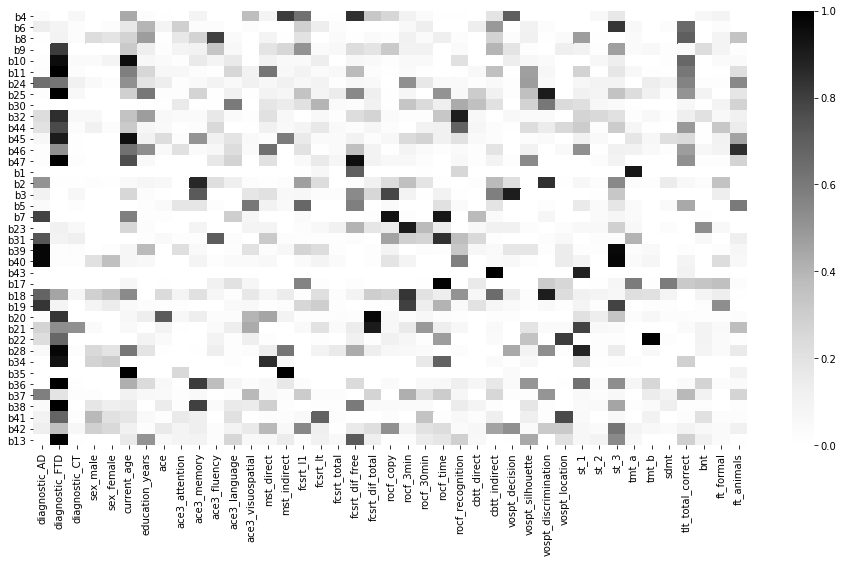

In [20]:
matplotlib.rcParams['figure.figsize'] = (16,8)
seaborn.heatmap(map_brodmann,cmap='Greys',xticklabels=True,yticklabels=True)

### Conclusions (best and worst predicted regions)

One good news is that **results improve considerably in all brain regions**. Even with such improvement, the capability to detect positive labels remains low in many cases. In addition, there is a great variability. In the neural networks approach, we saw the following trend: "for those regions where the number of positive labels is low, the models yield lower f1 scores but higher accuracies; for those regions where the number of positive labels is moderate, the models yield higher f1 scores but lower accuracies".  With this approach, the trend is not that clear. In fact, **there are regions with few positive labels that the model detect with acceptable f1 scores**. However, it is also noticeable that more unbalanced regions tend to yield results with considerable variability.

There is some information that could be considered in relation to those regions that are better and worst predicted (note that we have left out those with very low percentages of positive labels, since they are very difficult to categorise).

#### AAL atlas (90 regions)

The advantage of using the AAL atlas is that we can have information regarding both hemispheres. Regarding this, we can appreciate that **left sides tend to be predicted better than right sides**. In the following summary, we include the hemisphere in brackets: right (R), left (L), both (B).

Within the regions that are **best predicted**, we can recognise:

- Frontal lobe:
    - **F2O (R)** (middle frontal gyrus, orbital part)
    - **F3O (L)** (inferior frontal gyrus, orbital part)
    - **GR (B)** (rectus gyrus)
- Parietal lobe:
    - **RO (L)** (rolandic operculum)
    - **P1 (R)** (superior parietal gyrus)
    - **SMG (R)** (supramarginal gyrus)
- Occipital lobe:
    - **O1 (B)** (superior occipital gyrus)
    - **O3 (B)** (inferior occipital gyrus)
- Temporal lobe:
    - **T3 (L)** (inferior temporal gyrus)
    - **FUSI (R)** (fusiform gyrus)
    - **HIP (R)** (hippocampus)
- Insular lobe:
    - **IN (L)** (insula)
- Subcortical region:
    - **THA (B)** (thalamus)

Within the regions that are **worst predicted**, we can recognise:

- Frontal lobe:
    - **PRE (B)** (precentral gyrus)
    - **F3OP (R)** (inferior frontal gyrus, opercular part)
    - **MCIN (B)** (median cingulate gyrus)
- Parietal lobe:
    - **PCL (L)** (paracentral lobule)
    - **POST (B)** (postcentral gyrus)
    - **PCIN (B)** (posterior cingulate gyrus)
- Occipital lobe:
    - **V1 (B)** (calcarine fissure)
    - **LING (B)** (lingual gyrus)
- Temporal lobe:
    - **T1 (B)** (superior temporal gyrus)
    - **HES (L)** (heschl gyrus)
    - **PHIP (R)** (parahippocampal gyrus)
- Subcortical region:
    - **PUT (R)** (lenticular nucleus, putamen)

One interesting thing to see that some brain regions show a strange behaviour (one side is among the best predicted regions while the other side is among the worst predicted regions). These are the following (in brackets, we indicate the hemisphere that was better predicted):

- P1 (superior lateral gyrus) (R)

#### Brodmann atlas (47 regions)

Within the regions that are **best predicted**, we can recognise:

- Frontal lobe:
    - **B4** (primary motor cortex)
    - **B25** (ventromedial frontal cortex)
    - **B44** (broca's area)
    - **B45** (broca's area)
    - **B47** (inferior frontal gyrus, orbital part)
- Parietal lobe:
    - **B3** (primary somatosensory cortex)
    - **B39** (angular gyrus)
- Occipital lobe:
    - **B17** (primary visual cortex)
    - **B18** (secondary visual cortex)
- Temporal lobe:
    - **B28** (ventral entorhinal cortex)

Within the regions that are **worst predicted**, we can recognise:

- Frontal lobe:
    - **B6** (premotor and supplementary motor cortex)
    - **B8** (frontal cortex)
    - **B9** (dorsolateral prefrontal cortex)
    - **B10** (anterior prefrontal cortex)
    - **B24** (ventral anterior cingulate cortex)
- Parietal lobe:
    - **B23** (ventral posterior cingulate cortex)
    - **B30** (retrosplenial cortex)
    - **B31** (dorsal posterior cingualte cortex)
- Temporal lobe:
    - **B41** (auditory cortex)
    - **B42** (auditory cortex)

In all cases, **we must think about the need for a predictive model**. It could happen that the region we are trying to predict is not really important for diagnosis. This particularly needs to be considered for those regions where the percentage of positive values is very low. It is quite likely that positive labels there do not have a real meaning but are just noise. In such case, a model won't be needed. How will we know which regions are important? We need to consider Fernando's results and have a look at those regions that are detected as relevant for diagnosis.

### Conclusions (features associated to each region prediction)

**This discussion is only being made from the results of the multi-objective genetic algorithms**. The explanation is that we set the number of features as a parameter to be minimized, that resulted in models considering far less features. The direct consequence is that patterns regarding which features are more important turned much clearer. In this brief report, we include those features that are selected, for a region, in 80% or more of the cases (in bold we include those that are selected in 90% or more of the cases).

#### AAL atlas (90 regions)

*Diagnostic features*

- diagnostic_AD: 
    - Frontal lobe: 
        - **SMA (R)** (supplementary motor area)
    - Parietal lobe: 
        - **P2 (B)** (middle parietal gyrus)
        - AG (R) (angular gyrus)
    - Occipital lobe: 
        - **O2 (L)** (middle occipital gyrus)
- diagnostic_FTD: 
    - Frontal lobe: 
        - F1 (L) (superior frontal gyrus)
        - F1M (B) (superior frontal gyrus, medial part)
        - **F1O (B)** (superior frontal gyrus, orbital part)
        - F2 (L) (middle frontal gyrus)
        - F3T (R) (inferior frontal gyrus, triangular part)
        - **F3O (B)** (inferior frontal gyrus, orbital part)
        - **GR (B)** (rectus gyrus)
        - **OC (B)** (olfactory cortex)
        - **ACIN (B)** (anterior cingulate gyrus)
    - Occipital lobe: 
        - O3 (L) (inferior occipital gyrus)
    - Temporal lobe:
        - **T1P (B)** (superior temporal gyrus, temporal pole) 
        - **T2P (B)** (middle temporal gyrus, temporal pole)
        - **HES (B)** (heschl gyrus)
        - FUSI (R) (fusiform gyrus)
        - **HIP (B)** (hippocampus)
    - Insular lobe: 
        - **IN (B)** (insula)
    - Subcortical region: 
        - **CAU (R)** (caudate nucleus)
        - **PUT (B)** (lenticular nucleus, putamen)

*Demographic features*

- current_age: 
    - **F1 (B)** (superior frontal gyrus)
    - **F1M (R)** (superior frontal gyrus, medial part)
    - **F1O (R)** (superior frontal gyrus, orbital part)
    - **F2O (B)** (middle frontal gyrus, orbital part)
    - O3 (R) (inferior occipital gyrus)
    - **AMYG (R)** (amygdala)
- education_years: 
    - PRE (L) (precentral gyrus)

*Cognitive features*

- ace3_memory: 
    - **F2 (L)** (middle frontal gyrus)
    - PAL (R) (lenticular nucleus, pallidum)
- ace3_fluency:
    - **F2O (L)** (middle frontal gyrus, orbital part)
    - F3OP (L) (inferior frontal gyrus, opercular part)
    - F3T (L) (inferior frontal gyrus, triangular part)
- mst_direct: 
    - AMYG (R) (amygdala)
- mst_indirect: 
    - **AMYG (R)** (amygdala)
- fcsrt_l1: 
    - **F3T (L)** (inferior frontal gyrus, triangular part)
    - T3 (L) (inferior temporal gyrus)
- fcsrt_lt: 
    - LING (L) (lingual gyrus)
    - **AMYG (L)** (amygdala)
- fcsrt_dif_free: 
    - GR (L) (rectus gyrus)
    - RO (R) (rolandic operculum)
- fcsrt_dif_total: 
    - ACIN (R) (anterior cingulate gyrus)
- rocf_copy: 
    - **O1 (R)** (superior occipital gyrus)
    - **O3 (R)** (inferior occipital gyrus)
- rocf_3min: 
    - POST (R) (postcentral gyrus)
    - PCIN (R) (posterior cingulate gyrus)
- rocf_30min: 
    - PRE (R) (precentral gyrus)
    - **T2 (R)** (middle temporal gyrus)
    - **T3 (B)** (inferior temporal gyrus)
- rocf_time: 
    - **PAL (L)** (lenticular nucleus, pallidum)
    - THA (R) (thalamus)
- rocf_recognition: 
    - **ACIN (L)** (anterior cingulate gyrus)
    - **MCIN (R)** (posterior cingulate gyrus)
    - PCL (L) (paracentral lobule)
- cbtt_indirect: 
    - LING (R) (lingual gyrus)
- vospt_decision: 
    - PAL (R) (lenticular nucleus, pallidum)
- vospt_silhouette: 
    - **RO (L)** (rolandic operculum)
    - T1P (R) (superior temporal gyrus, temporal pole)
- vospt_discrimination: 
    - **O2 (L)** (middle occipital gyrus)
    - **O3 (L)** (inferior occipital gyrus)
    - V1 (L) (calcarine fissure)
    - LING (L) (lingual gyrus)
- vospt_location: 
    - Q (R) (cuneus)
- st3: 
    - **SMA (L)** (supplementary motor area)
    - **P2 (L)** (middle parietal gyrus)
    - **AG (L)** (angular gyrus)
    - SMG (L) (supramarginal gyrus)
    - **T2 (L)** (middle temporal gyrus)
- tmt_b: 
    - PCL (L) (paracentral lobule)
- sdmt: 
    - **MCIN (R)** (median cingulate gyrus)
- tlt_total_correct:
    - SMA (R) (supplementary motor area)
    - **F1 (R)** (superior frontal gyrus)
    - **PUT (R)** (lenticular nucleus, putamen)
- bnt: 
    - FUSI (L) (fusiform gyrus)
- ft_animals: 
    - **F2 (R)** (middle frontal gyrus)
    - T2 (L) (middle temporal gyrus)
    - **THA (L)** (thalamus)

#### Brodmann atlas (47 regions)

*Diagnostic features*

- diagnostic_AD:
    - Parietal lobe: 
        - **B39** (angular gyrus)
        - **B40** (supramarginal gyrus)
    - Occipital lobe: 
        - B19 (associative visual cortex)
- diagnostic_FTD:
    - Frontal lobe: 
        - B9 (dorsolateral prefrontal cortex)
        - **B10** (anterior prefrontal cortex)
        - **B11** (orbitofrontal area)
        - **B25** (ventromedial prefrontal cortex)
        - B32 (dorsal anterior cingulate cortex)
        - **B45** (broca's area)
        - **B47** (inferior frontal gyrus, orbital part)
    - Temporal lobe:
        - B20 (inferior temporal gyrus)
        - **B28** (ventral entorhinal cortex)
        - **B34** (dorsal entorhinal cortex)
        - **B36** (perirhinal cortex)
        - **B38** (temporopolar area)
    - Insular lobe: 
        - **B13** (insular cortex)

*Demographic features*

- current_age: 
    - **B10** (anterior prefrontal cortex)
    - **B45** (broca's area)
    - **B35** (perirhinal cortex)

*Cognitive features*

- ace3_memory: 
    - B2 (primary somatosensory cortex)
    - B36 (perirhinal cortex)
- mst_direct: 
    - B34 (dorsal entorhinal cortex)
- mst_indirect: 
    - B4 (primary motor cortex)
    - **B35** (perirhinal cortex)
- fcsrt_dif_free: 
    - B4 (primary motor cortex)
    - **B47** (inferior frontal gyrus, orbital part)
- fcsrt_dif_total: 
    - **B20** (inferior temporal gyrus)
    - **B21** (middle temporal gyrus)
- rocf_copy: 
    - **B7** (visuomotor coordination)
- rocf_3min: 
    - **B23** (ventral posterior cingulate cortex)
    - B18 (secondary visual cortex)
- rocf_time: 
    - **B7** (visuomotor coordination)
    - B31 (dorsal posterior cingulate cortex)
    - **B17** (primary visual cortex)
- rocf_recognition: 
    - B32 (dorsal anterior cingulate cortex)
- cbtt_indirect: 
    - **B43** (primary gustatory cortex)
- vospt_decision: 
    - B3 (primary somatosensory cortex)
- vospt_discrimination: 
    - **B25** (ventromedial prefrontal cortex)
    - B2 (primary somatosensory cortex)
    - B18 (secondary visual cortex)
- vospt_location: 
    - B22 (superior temporal gyrus)
- st_1: 
    - B43 (primary gustatory cortex)
    - B28 (ventral entorhinal cortex)
- st_3: 
    - **B39** (angular gyrus)
    - **B40** (supramarginal gyrus)
- tmt_a:
    - **B1** (primary somatosensory cortex)
- tmt_b: 
    - **B22** (superior temporal gyrus)
- ft_animals: 
    - B46 (dorsolateral prefrontal cortex)